## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.2.5
numpy version: 1.20.2
seaborn version: 0.11.1
sklearn version: 0.24.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('../../Nattawat/dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
df.head()

,year,year_num,province,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
0,2016,1,krabi,1,137,1976.0,81.9,37.5,18.4,27.2,4,0.23,1714
1,2016,1,Bkk,2,113,1907.6,73.6,39.8,19.2,29.2,3,0.05,6291
2,2016,1,Kranjanaburi,3,97,963.2,67.8,42.3,14.8,29.2,5,0.41,1212
3,2016,1,Kalasilp,4,105,1283.6,77.1,41.8,9.9,27.2,0,0.00,1420
4,2016,1,Kampangpech,5,112,967.0,71.3,41.5,14.4,28.4,1,0.15,669


In [5]:
# Tempolary data preparation and just use for build model 

In [6]:
df = df.drop(columns=['province', 'year'])

In [7]:
df = df.loc[df['year_num'] == 1]
df

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
0,1,1,137,1976.0,81.9,37.5,18.4,27.2,4,0.23,1714
1,1,2,113,1907.6,73.6,39.8,19.2,29.2,3,0.05,6291
2,1,3,97,963.2,67.8,42.3,14.8,29.2,5,0.41,1212
3,1,4,105,1283.6,77.1,41.8,9.9,27.2,0,0.00,1420
4,1,5,112,967.0,71.3,41.5,14.4,28.4,1,0.15,669
...,...,...,...,...,...,...,...,...,...,...,...
72,1,73,106,1329.9,69.7,41.7,12.6,28.1,1,0.16,616
73,1,74,117,1129.1,70.6,41.9,9.8,27.5,0,0.00,375
74,1,75,90,825.6,68.6,41.8,14.0,28.5,1,0.33,302
75,1,76,105,771.4,71.3,42.4,14.2,29.1,0,0.00,1561


In [8]:
df.tail(10)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
67,1,68,150,1454.9,83.6,38.5,18.3,27.4,2,0.07,2727
68,1,69,108,1258.6,71.2,41.3,12.8,28.0,0,0.00,575
69,1,70,112,1523.5,72.1,41.5,11.5,27.8,0,0.00,215
70,1,71,109,862.3,73.6,42.4,9.3,26.5,3,0.19,1557
71,1,72,86,960.4,74.2,40.7,16.2,29.0,0,0.00,1062
72,1,73,106,1329.9,69.7,41.7,12.6,28.1,1,0.16,616
73,1,74,117,1129.1,70.6,41.9,9.8,27.5,0,0.00,375
74,1,75,90,825.6,68.6,41.8,14.0,28.5,1,0.33,302
75,1,76,105,771.4,71.3,42.4,14.2,29.1,0,0.00,1561
76,1,77,106,1329.9,69.7,41.7,12.6,28.1,6,0.12,4884


In [9]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,77.0,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.0,39.000000,116.298701,1375.227273,74.480519,39.741558,14.924675,27.985714,1.857143,0.102857,1596.428571
std,0.0,22.371857,25.780483,617.275140,4.180312,2.688932,3.419493,0.854048,2.553193,0.119592,1417.353579
min,1.0,1.000000,76.000000,771.400000,66.500000,24.000000,8.700000,25.300000,0.000000,0.000000,113.000000
25%,1.0,20.000000,101.000000,960.400000,71.300000,38.500000,12.200000,27.400000,0.000000,0.000000,595.000000
50%,1.0,39.000000,108.000000,1171.600000,73.600000,40.000000,14.400000,28.000000,1.000000,0.070000,1212.000000
75%,1.0,58.000000,127.000000,1628.000000,77.700000,41.700000,18.300000,28.600000,3.000000,0.180000,2134.000000
max,1.0,77.000000,175.000000,3918.400000,83.600000,43.100000,22.900000,29.600000,13.000000,0.460000,7194.000000


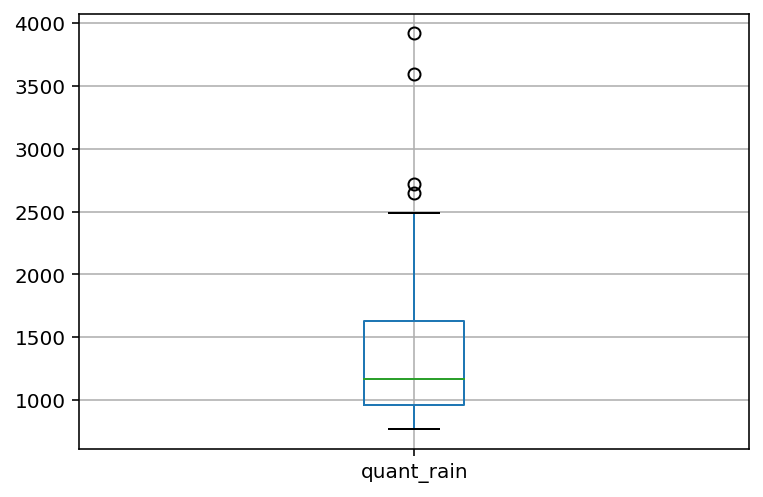

In [10]:
#find outliers
boxplot = df.boxplot(column=['quant_rain'])

In [11]:
# Greater than 50000 replace to mean value.(Did it make score drop)

#df['patient'] = np.where(df['patient'] > 5000, 4950, df['patient'])
#df['quant_rain'] = np.where(df['quant_rain'] > 3000, 2950, df['quant_rain'])

In [12]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [13]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg']]

In [14]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg
72,0.303030,0.177471,0.187135,0.926702,0.274648,0.651163
73,0.414141,0.113664,0.239766,0.937173,0.077465,0.511628
74,0.141414,0.017223,0.122807,0.931937,0.373239,0.744186
75,0.292929,0.000000,0.280702,0.963351,0.387324,0.883721
76,0.303030,0.177471,0.187135,0.926702,0.274648,0.651163


In [16]:
## log transform to target variable impove RMSE value.(optional)

#df['patient'] = np.log(df['patient'])

In [17]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [18]:
## Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [19]:
df_pre.describe().round(2)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,patient
count,77.0,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,1.0,39.00,0.41,0.19,0.47,0.82,0.44,0.62,1596.43
std,0.0,22.37,0.26,0.20,0.24,0.14,0.24,0.20,1417.35
min,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,113.00
25%,1.0,20.00,0.25,0.06,0.28,0.76,0.25,0.49,595.00
50%,1.0,39.00,0.32,0.13,0.42,0.84,0.40,0.63,1212.00
75%,1.0,58.00,0.52,0.27,0.65,0.93,0.68,0.77,2134.00
max,1.0,77.00,1.00,1.00,1.00,1.00,1.00,1.00,7194.00


In [20]:
# ## Visaulization corriration in gharph.

# sns.pairplot(df_pre)
# plt.show()

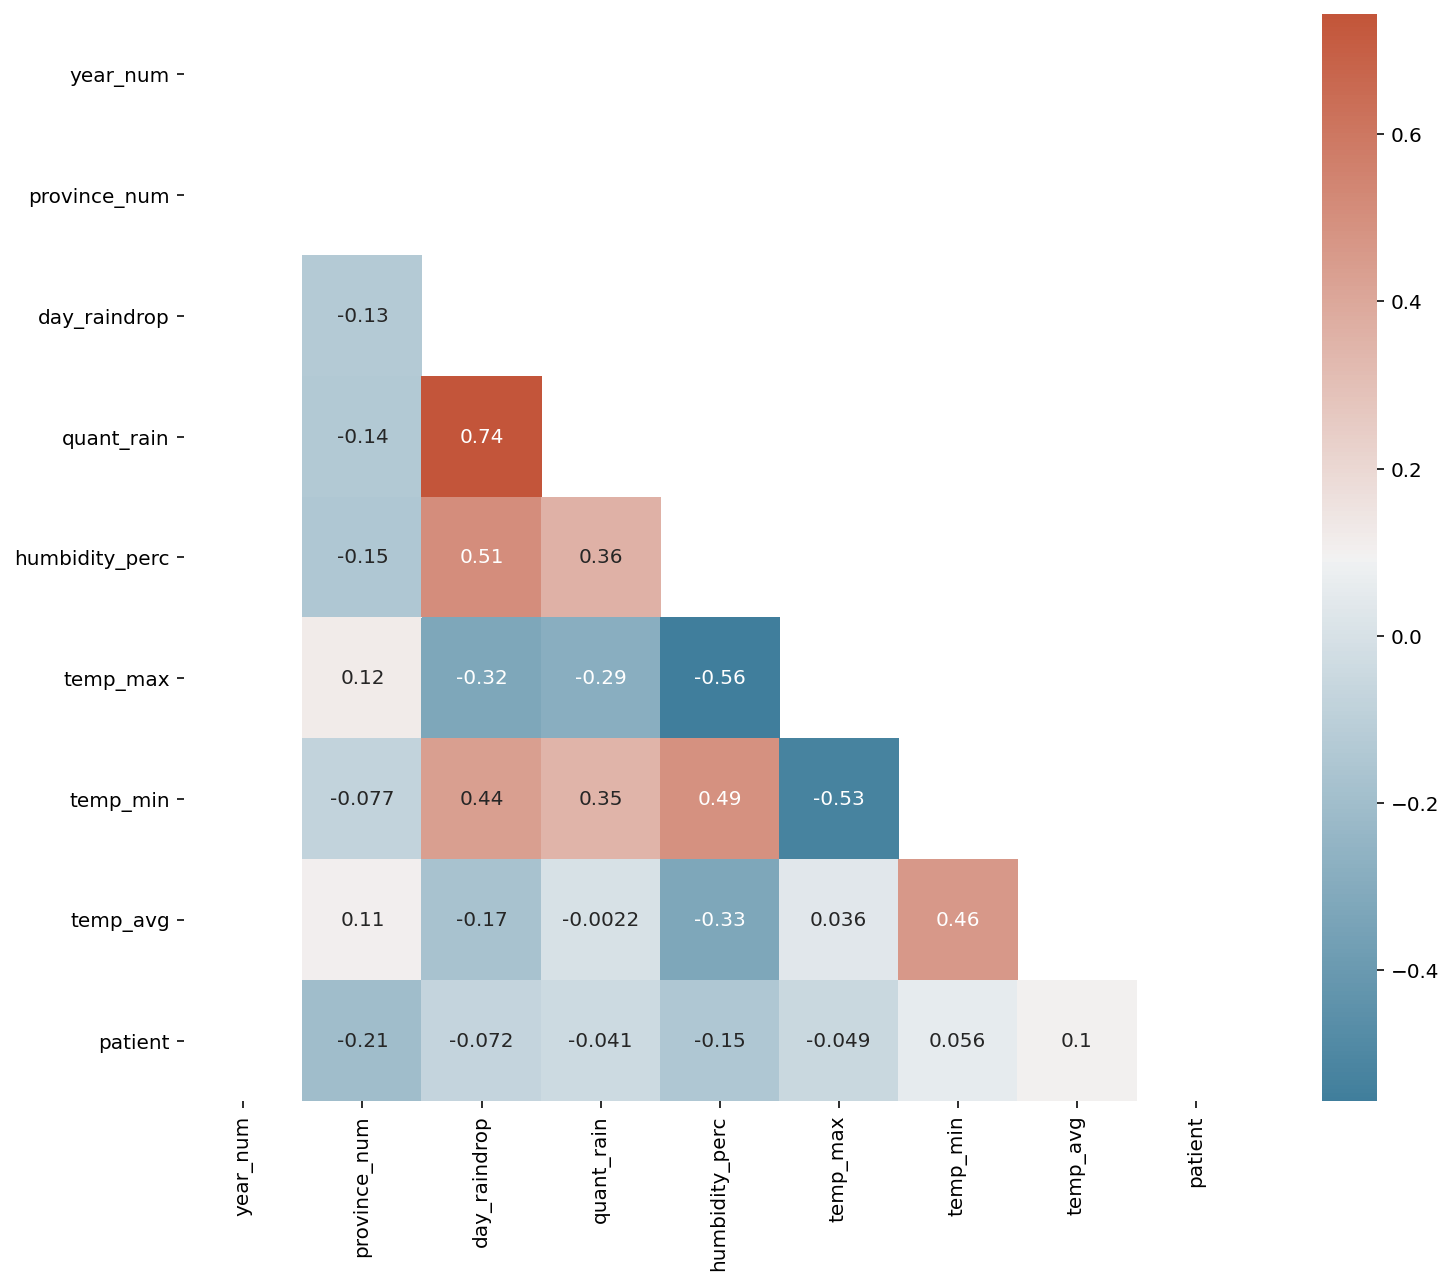

In [21]:
## Correlation between different variables

corr = df_pre.corr()

## Set up the matplotlib plot configuration

f, ax = plt.subplots(figsize=(12, 10))

## Generate a mask for upper traingle

mask = np.triu(np.ones_like(corr, dtype=bool))

## Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)

## Draw the heatmap

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.show()

# Building Linear Regression Model

1. Features selection for Linear Regression Model
2. Train Test Split
3. Creating and Training the Model
4. Model Evaluation


## Features selection for Regression Model

In [22]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'patient'],
      dtype='object')

In [34]:
# X = df_pre[['year_num', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]
X = df_pre[[ 'day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg']]
y = df_pre['patient']

## Train Test Split

This step we will separate data to train (training set) and การ test (testing set)
* training set use for train model 
* testing set use for  test model or call that Evaluation 


In [24]:
from sklearn.model_selection import train_test_split

In [35]:
# Train dataset 80% and Test dataset 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

## Creating and Training the Model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# Try to use simple model: Linear Regression.
lm = LinearRegression()

In [38]:
# fit model to Train and test set.
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

evaluate model by visit coefficients of each item

In [39]:
# print the intercept
print(lm.intercept_)

4121.790656190087


In [40]:
# create Data Frame 
# Data is lm.coef_
# labal is name of X.columns
# Column is'Coefficient'
coeff_df = pd.DataFrame(lm.coef_ , X.columns , columns=['Coefficient'])
coeff_df

,Coefficient
day_raindrop,-108.902863
quant_rain,-30.470131
humbidity_perc,-2207.258321
temp_max,-1612.228857
temp_min,1361.998514
temp_avg,-1051.985394


## Predictions from our Model

In [41]:
# Predicting X test
predictions = lm.predict(X_test)

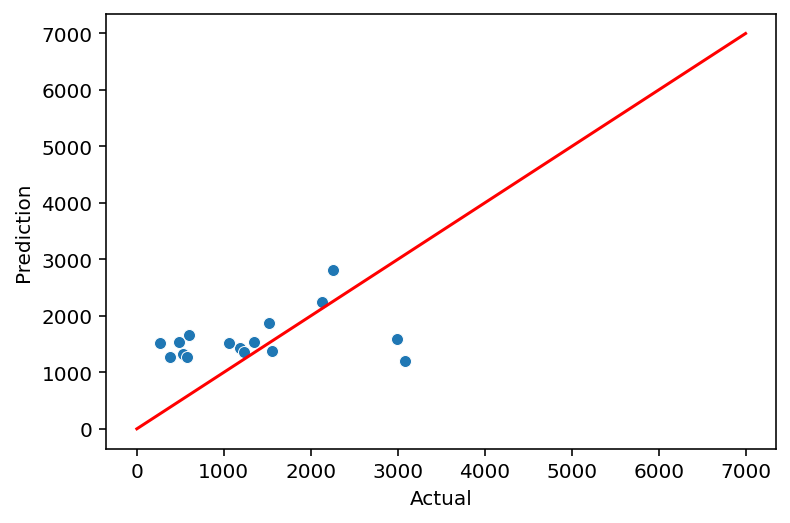

In [43]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')

# generate and graph y = x line

x_plot = np.linspace(0,7000,10000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.show()

# Simulate linear line

## Prediction

In [44]:
# Choose one of sample to predict and see result

# input : X_test.loc[[random sample for prediction test]]
    
y_pred = lm.predict(X_test.loc[[112]])

plt.scatter(y_test.loc[[112]],  y_pred)
print( "Actual Patient",float(y_test.loc[[112]] ) )
print( "Predicted Patient", float( y_pred))

KeyError: "None of [Int64Index([112], dtype='int64')] are in the [index]"

**Residual Histogram**

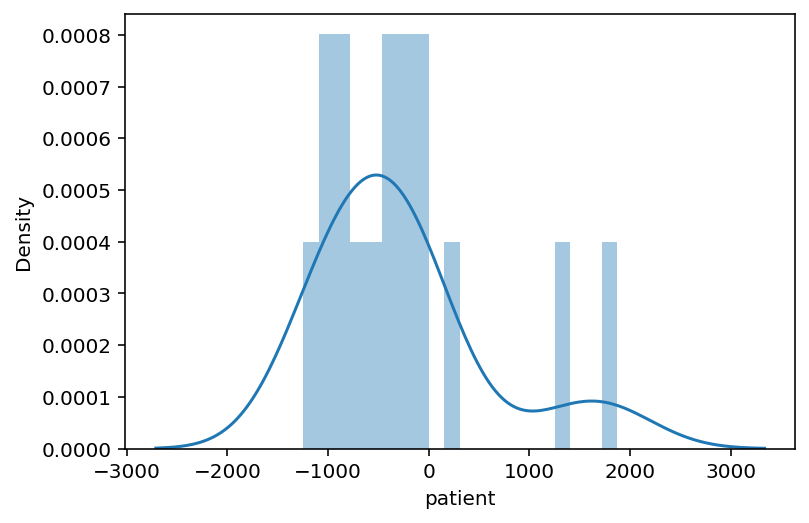

In [46]:
sns.distplot((y_test-predictions),bins=20);

### Actual value and the predicted value

In [48]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(10)

,Actual value,Predicted value
16,2134,2248.969243
29,1353,1531.658119
60,1518,1872.933663
33,382,1277.245679
58,2990,1587.251421
47,264,1512.477187
25,530,1325.334909
70,1557,1378.975580
36,1183,1433.798033
71,1062,1519.572327


In [ ]:
mlr_diff.describe()

In [ ]:
# Expo transform to target variable
#y_test_exp = np.exp(y_test)
#predictions_exp = np.exp(predictions).round(2)

In [ ]:
#Actual value and the predicted value
#mlr_diff = pd.DataFrame({'Actual value': y_test_exp, 'Predicted value': predictions_exp})
#mlr_diff.head(20)

## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [49]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(lm.score(X_train,y_train)))
print('R squared of Testing Set: {:.2f}'.format(lm.score(X_test,y_test)))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 0.05
R squared of Testing Set: 0.00
Mean Absolute Error (MAE): 702.7962
Root Mean Squared Error (RMSE): 865.0408


### Record

In [ ]:
# Test1   30/9/2564 16:15  test_size=0.20, random_state=60

# Normal linear regression

# R squared of Training Set: 39.58
# Mean Absolute Error (MAE): 0.6420
# Mean Squared Error (MSE): 0.6596
# Root Mean Squared Error (RMSE): 0.8122
#  

In [ ]:
# Test2  01/10/2021 13.45

# Test "Recursive Feature Elimination: RFE" result still need all features to use

##----Result of testing----##

# 1 = 0.2126
# 2 = 0.2643
# 3 = 0.2476
# 4 = 0.2953
# 5 = 0.2999
# 6 = 0.2816
# 7 = 0.2851
# 8 = 0.2899
# 9 = 0.2897
# 10 = 0.2706

# Result generated highest score at 0.2431 in 7 Features
#[('year', False, 4),
 #('province_num', False, 6),
 #('day_raindrop', False, 2),
 #('quant_rain', False, 3),
 #('humbidity_perc', False, 5),
 #('temp_max', True, 1),
 #('temp_min', True, 1),
 #('temp_avg', True, 1),
 #('dead', True, 1),
 #('dead_perc', True, 1)]

# after remove 5 feature we got the result as below
# R squared of Training Set: 35.61
# Mean Absolute Error (MAE): 0.6306
# Mean Squared Error (MSE): 0.6330
# Root Mean Squared Error (RMSE): 0.7956

# next Plan
# 1. Hyperparameter Tuning Using Grid Search Cross-Validation
# 2. Search more sample data


In [ ]:
# Test3  04/10/2021 16.00

###==Hyperparameter Tuning Using Grid Search Cross-Validation==###
# n_splits = 5, shuffle = True, random_state = 60


# R squared of Training Set: 38.71
# Mean Absolute Error (MAE): 0.6383
# Mean Squared Error (MSE): 0.6422
# Root Mean Squared Error (RMSE): 0.8014

# next Plan
# 1. Search more sample data

In [ ]:
# Test4 11/10/2021 10:00

# Plan changed
# 1. take more R2 ,try more than 60

In [ ]:
# Test5 12/10/2021 20:30
# Recheck before create report

# REF
##----Result of training----##
# 1 = 0.3624
# 2 = 0.5066
# 3 = 0.5078
# 4 = 0.5103
# 5 = 0.5127
# 6 = 0.5138
# 7 = 0.5138
# 8 = 0.5140
# 9 = 0.5242
# 10 = 0.5246

##----Result of testing----##
# 1 = 0.5754
# 2 = 0.6540
# 3 = 0.6500
# 4 = 0.6537
# 5 = 0.6576 ***
# 6 = 0.6539
# 7 = 0.6529
# 8 = 0.6518
# 9 = 0.6401
# 10 = 0.6425

# Result generated highest score at 0.6576 in 5 Features
#[('year', False, 4),
 #('province_num', False, 6),
 #('day_raindrop', False, 2),
 #('quant_rain', False, 3),
 #('humbidity_perc', False, 5),
 #('temp_max', True, 1),
 #('temp_min', True, 1),
 #('temp_avg', True, 1),
 #('dead', True, 1),
 #('dead_perc', True, 1)]
    
# Result shown that they need more data and more sample size.

In [ ]:
# Test6 13/10/2021 09:30
# Reporting

In [ ]:
# Create Model Evaluate Report @ 19/10/2021